In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
df = pd.read_csv('combined_csv_wealthmanagement.csv')
df.head()

,date,username,to,replies,retweets,favorites,text,geo,mentions,hashtags,id,permalink
0,12/31/2019 23:45,HT_Great_Lakes,NaN,0,1,1,Thinking about transitioning your business? Yo...,NaN,NaN,#wealthmanagement #hightowergreatlakes #busine...,1.212160e+18,https://twitter.com/HT_Great_Lakes/status/1212...
1,12/31/2019 23:31,ripsawwealth,NaN,0,2,3,http://RipsawWealth.com #2020WillBeTheYearFor ...,NaN,NaN,#2020WillBeTheYearFor #HappyNewYear #happynewy...,1.212150e+18,https://twitter.com/ripsawwealth/status/121215...
2,12/31/2019 23:00,TedHunter1,NaN,0,0,0,#wealthmanagement #maxous,NaN,NaN,#wealthmanagement #maxous,1.212150e+18,https://twitter.com/TedHunter1/status/12121465...
3,12/31/2019 22:45,RAlexJimenez,NaN,0,0,0,#WealthManagement and private banking trends: ...,NaN,@FinTechMagazine,#WealthManagement #wealthtech #fintech #finserv,1.212140e+18,https://twitter.com/RAlexJimenez/status/121214...
4,12/31/2019 22:43,findadvisor,NaN,0,0,0,Is Your Money Ready for Retirement? #Retiremen...,NaN,NaN,#RetirementPlan #FinancialPlan #WealthManageme...,1.212140e+18,https://twitter.com/findadvisor/status/1212142...


In [4]:
df_tweets = df[["date","text"]]
df_tweets = df_tweets.dropna()
df_tweets

,date,text
0,12/31/2019 23:45,Thinking about transitioning your business? Yo...
1,12/31/2019 23:31,http://RipsawWealth.com #2020WillBeTheYearFor ...
2,12/31/2019 23:00,#wealthmanagement #maxous
3,12/31/2019 22:45,#WealthManagement and private banking trends: ...
4,12/31/2019 22:43,Is Your Money Ready for Retirement? #Retiremen...
...,...,...
26951,3/19/2019 17:11,.@Praemium said its major technology upgrade w...
26952,3/19/2019 16:59,A Seismic Shift in the Estate-Planning Landsca...
26953,3/19/2019 16:58,"Interview: Scott Cooper, @CybiWealth – investi..."
26954,3/19/2019 16:18,How much are you worth? . . . . #wealth #Wealt...


In [5]:
from sklearn.feature_extraction.text import CountVectorizer
from gensim.corpora import Dictionary
from gensim.models.ldamodel import LdaModel
from gensim.models import CoherenceModel
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from datetime import datetime
import nltk
nltk.download('stopwords')
import pandas as pd
import re
import math

def clean_tweets(df=df_tweets, 
                 tweet_col='text', 
                 date_col='date'
                ):
    
    df_copy = df.copy()
    
    # drop rows with empty values
    df_copy.dropna(inplace=True)
    
    # lower the tweets
    df_copy['preprocessed_' + tweet_col] = df_copy[tweet_col].str.lower()
    
    # filter out stop words and URLs
    en_stop_words = stopwords.words('english')
    extended_words = ['&amp;', 'rt','th','co', 're', 've', 'kim', 'daca', '#wealthmanagement', 'wealthmanagement', 'de', 'la', 'en', 'ria', 'di', 'el', 'ask', 'un', 'con', 'per', 'del', 'help', 'you', 'via', 'us', 'gt', 'ai', 'cx']
    en_stop_words.extend(extended_words)
    en_stop_words = set(en_stop_words)
    url_re = '(https?:\/\/(?:www\.|(?!www))[a-zA-Z0-9][a-zA-Z0-9-]+[a-zA-Z0-9]\.[^\s]{2,}|www\.[a-zA-Z0-9][a-zA-Z0-9-]+[a-zA-Z0-9]\.[^\s]{2,}|https?:\/\/(?:www\.|(?!www))[a-zA-Z0-9]+\.[^\s]{2,}|www\.[a-zA-Z0-9]+\.[^\s]{2,})'        
    df_copy['preprocessed_' + tweet_col] = df_copy['preprocessed_' + tweet_col].apply(lambda row: ' '.join([word for word in row.split() if (not word in en_stop_words) and (not re.match(url_re, word))]))
    
    # tokenize the tweets
    tokenizer = RegexpTokenizer('[a-zA-Z]\w+\'?\w*')
    df_copy['tokenized_' + tweet_col] = df_copy['preprocessed_' + tweet_col].apply(lambda row: tokenizer.tokenize(row))
    
    return df_copy
  
df_tweets_clean = clean_tweets(df_tweets)
df_tweets_clean.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aditya.baser\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,date,text,preprocessed_text,tokenized_text
0,12/31/2019 23:45,Thinking about transitioning your business? Yo...,thinking transitioning business? you’ll surpri...,"[thinking, transitioning, business, you, ll, s..."
1,12/31/2019 23:31,http://RipsawWealth.com #2020WillBeTheYearFor ...,#2020willbetheyearfor financial control! #happ...,"[willbetheyearfor, financial, control, happyne..."
2,12/31/2019 23:00,#wealthmanagement #maxous,#maxous,[maxous]
3,12/31/2019 22:45,#WealthManagement and private banking trends: ...,private banking trends: 2020 | @fintechmagazin...,"[private, banking, trends, fintechmagazine, we..."
4,12/31/2019 22:43,Is Your Money Ready for Retirement? #Retiremen...,money ready retirement? #retirementplan #finan...,"[money, ready, retirement, retirementplan, fin..."


In [6]:
def get_most_freq_words(str, n=None):
    vect = CountVectorizer().fit(str)
    bag_of_words = vect.transform(str)
    sum_words = bag_of_words.sum(axis=0) 
    freq = [(word, sum_words[0, idx]) for word, idx in vect.vocabulary_.items()]
    freq =sorted(freq, key = lambda x: x[1], reverse=True)
    return freq[:n]
  
get_most_freq_words([ word for tweet in df_tweets_clean.tokenized_text for word in tweet],10)

[('wealth', 5710),
 ('investing', 3565),
 ('financialplanning', 2957),
 ('investment', 2855),
 ('fintech', 2773),
 ('financial', 2575),
 ('money', 2447),
 ('retirement', 2171),
 ('finance', 2117),
 ('management', 2078)]

In [7]:
# build a dictionary where for each tweet, each word has its own id.
# We have 6882 tweets and 10893 words in the dictionary.
tweets_dictionary = Dictionary(df_tweets_clean.tokenized_text)

# build the corpus i.e. vectors with the number of occurence of each word per tweet
tweets_corpus = [tweets_dictionary.doc2bow(tweet) for tweet in df_tweets_clean.tokenized_text]

## Do not Run the below Cell - Takes 45 mins to run

In [8]:
# compute coherence
tweets_coherence = []
for nb_topics in range(1,25):
    lda = LdaModel(tweets_corpus, num_topics = nb_topics, id2word = tweets_dictionary, passes=10)
    cohm = CoherenceModel(model=lda, corpus=tweets_corpus, dictionary=tweets_dictionary, coherence='u_mass')
    coh = cohm.get_coherence()
    tweets_coherence.append(coh)

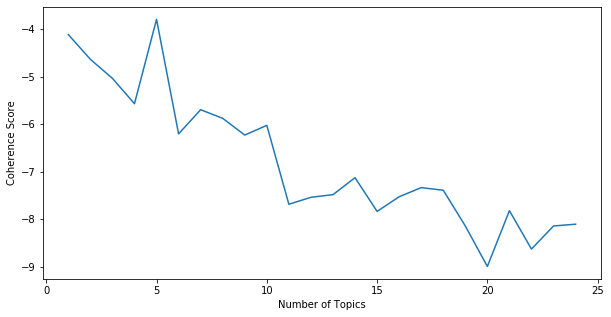

In [9]:
# visualize coherence
plt.figure(figsize=(10,5))
plt.plot(range(1,25),tweets_coherence)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score");

In [8]:
k = 13
tweets_lda = LdaModel(tweets_corpus, num_topics = k, id2word = tweets_dictionary, passes=10)

def plot_top_words(lda=tweets_lda, nb_topics=k, nb_words=10):
    top_words = [[word for word,_ in lda.show_topic(topic_id, topn=50)] for topic_id in range(lda.num_topics)]
    top_betas = [[beta for _,beta in lda.show_topic(topic_id, topn=50)] for topic_id in range(lda.num_topics)]

    gs  = gridspec.GridSpec(round(math.sqrt(k))+1,round(math.sqrt(k))+1)
    gs.update(wspace=0.5, hspace=0.5)
    plt.figure(figsize=(20,15))
    for i in range(nb_topics):
        ax = plt.subplot(gs[i])
        plt.barh(range(nb_words), top_betas[i][:nb_words], align='center',color='blue', ecolor='black')
        ax.invert_yaxis()
        ax.set_yticks(range(nb_words))
        ax.set_yticklabels(top_words[i][:nb_words])
        plt.title("Topic "+str(i))

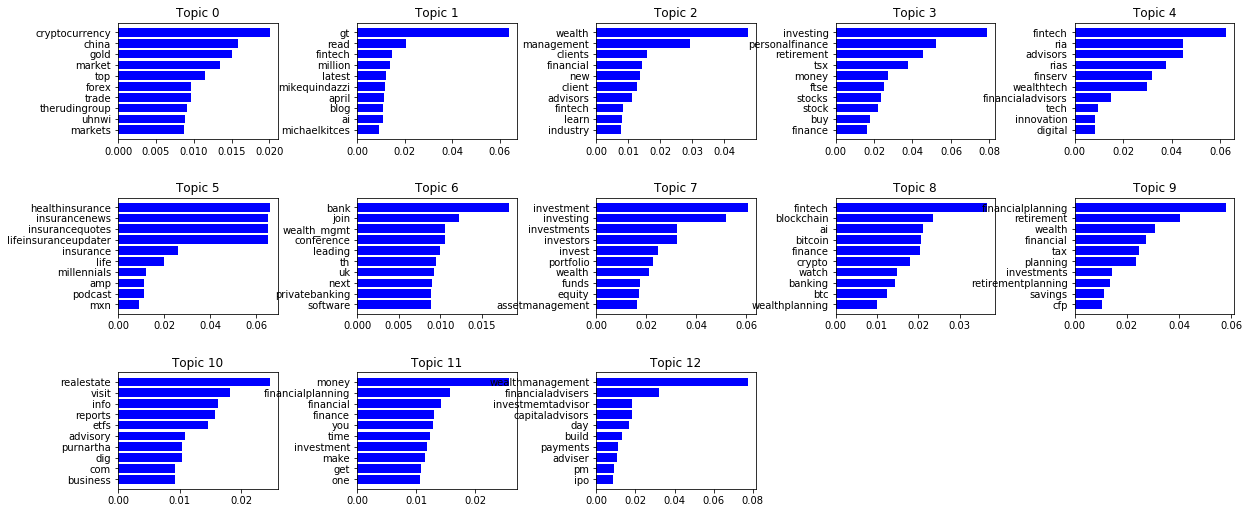

In [9]:
import matplotlib.gridspec as gridspec
plot_top_words()

In [10]:
list1 = []
list2 = []
for i in range(len(df_tweets_clean)):
    x = tweets_lda[tweets_corpus[i]]
    x.sort(key=lambda x:x[1], reverse = True)
    list1.append('Topic'+str(x[0][0]))
    try:
        if x[1][1] > 0.3:
            list2.append('Topic'+str(x[1][0]))
        else: 
            list2.append(None)
    except: 
            list2.append(None)

In [11]:
print(len(list1),len(list2))

26956 26956


In [12]:
df_tweets_clean["Label1"] = list1
df_tweets_clean["Label2"] = list2
df_tweets_clean.head()

,date,text,preprocessed_text,tokenized_text,Label1,Label2
0,12/31/2019 23:45,Thinking about transitioning your business? Yo...,thinking transitioning business? you’ll surpri...,"[thinking, transitioning, business, you, ll, s...",Topic11,None
1,12/31/2019 23:31,http://RipsawWealth.com #2020WillBeTheYearFor ...,#2020willbetheyearfor financial control! #happ...,"[willbetheyearfor, financial, control, happyne...",Topic11,None
2,12/31/2019 23:00,#wealthmanagement #maxous,#maxous,[maxous],Topic0,None
3,12/31/2019 22:45,#WealthManagement and private banking trends: ...,private banking trends: 2020 | @fintechmagazin...,"[private, banking, trends, fintechmagazine, we...",Topic4,None
4,12/31/2019 22:43,Is Your Money Ready for Retirement? #Retiremen...,money ready retirement? #retirementplan #finan...,"[money, ready, retirement, retirementplan, fin...",Topic9,None


In [16]:
pip install wikiapi

Note: you may need to restart the kernel to use updated packages.


In [17]:
pip install pattern

  Created wheel for pattern: filename=Pattern-3.6-cp37-none-any.whl size=22332727 sha256=ef470670d8fb8f35c0d3fc08a860606b7e022ce3c172af846dfd1cee5bafe72d
  Stored in directory: C:\Users\daani\AppData\Local\pip\Cache\wheels\dc\9a\0e\5fb1a603ed4e3aa8722a88e9cf4a82da7d1b63e3d2cc34bee5
  Created wheel for feedparser: filename=feedparser-5.2.1-cp37-none-any.whl size=44944 sha256=089645099bb3f0b6d11be9fac22ec7b77d8e15e2f9dee8affb929533d906bccb
  Stored in directory: C:\Users\daani\AppData\Local\pip\Cache\wheels\8c\69\b7\f52763c41c5471df57703a0ef718a32a5e81ee35dcf6d4f97f
  Created wheel for python-docx: filename=python_docx-0.8.10-cp37-none-any.whl size=184496 sha256=183ae230038f3381dcc105eb175f63307faf138336a8c2a74e9cf08ba47ec74c
  Stored in directory: C:\Users\daani\AppData\Local\pip\Cache\wheels\18\0b\a0\1dd62ff812c857c9e487f27d80d53d2b40531bec1acecfa47b
Successfully built pattern feedparser python-docx
Note: you may need to restart the kernel to use updated packages.


In [1]:
from wikiapi import WikiApi
import gensim
from gensim.utils import simple_preprocess, lemmatize
import pattern 
def get_relevant_articles(keywords, search_depth=5, keyword_summary=5):
    """
    Searches through a list of keywords and returns keywords based on article headers
    in Wikipedia.    

    args:
    *  keywords: A list of keywords
    *  search_depth: how many wikipedia search results are checked, assumes to be between 1-10
    *  keyword_summary: gensim word argument to how many words should be used in summarization
    """
    if len(keywords) == 0:
        return []
    wiki = WikiApi()

    keywords = [x.lower() for x in keywords]
    info = []
    for keyword in keywords:
        results = wiki.find(keyword)
        other_words = [x for x in keywords if x != keyword]
        
        if search_depth is not None:
            results = results[:search_depth]

        for result in results:
            article = wiki.get_article(result)
            summary_words = article.summary.lower().split(' ')
            has_words = any(word in summary_words for word in other_words)

            if has_words:
                info.append(article.heading)

    try:
        info_keyword = gensim.summarization.keywords(' '.join(info),
                    words=keyword_summary).split('\n')
    except:
        print("keyword extraction failed, defaulting to article heading output")
        info_keyword = info[:]
    return info_keyword

In [2]:
all_results = get_relevant_articles("financial financialplanning advisors wealth planning advice retirement clients money goals".split())
print(all_results)

C:\Users\daani\Anaconda3\lib\site-packages\wikiapi\wikiapi.py:122: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 122 of the file C:\Users\daani\Anaconda3\lib\site-packages\wikiapi\wikiapi.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  return BeautifulSoup(text).text


keyword extraction failed, defaulting to article heading output
['Finance', 'Financial centre', 'Financial endowment', 'Financial Planning Association of Australia', 'Financial Planning Standards Council (Canada)', 'Financial Planning Association', 'Financial planning (business)', 'Financial Planning Standards Board India', 'AdvisorShares', 'Wealth', 'Wealth tax', 'Wealth of Donald Trump', 'Wealthsimple', 'Retirement community', 'Retirement plans in the United States', 'Money laundering', 'Money supply']


In [20]:
texts = list(df_tweets_clean["tokenized_text"])

In [21]:
def convert_list_to_string(list_, separator = ' '):
    tweetss = []
    for i in list_:
        tweetss.append(separator.join(i))
    return tweetss

tweetss = convert_list_to_string(texts, separator = ' ')
df_clean = pd.DataFrame(tweetss, columns = ['tweets'])
df_clean.head()

,tweets
0,thinking transitioning business you ll surpris...
1,willbetheyearfor financial control happynewyea...
2,maxous
3,private banking trends fintechmagazine wealtht...
4,money ready retirement retirementplan financia...


In [3]:
from gensim import corpora
from gensim.models.ldamodel import LdaModel
from gensim.parsing.preprocessing import STOPWORDS

In [4]:
#Set parameters
num_topics = 11 #The number of topics that should be generated
passes = 3
dictionary = corpora.Dictionary(texts) #(word_id,word) pairs
corpus = [dictionary.doc2bow(text) for text in texts] #(word_id,freq) pairs by sentence

NameError: name 'texts' is not defined

In [2]:
lda = LdaModel(corpus,
              id2word=dictionary,
              num_topics=num_topics,
              passes=passes)

NameError: name 'LdaModel' is not defined

In [68]:
lda[corpus[len(texts)-1]]

[(1, 0.24300687), (5, 0.68260777)]

In [ ]:
list_ = []

for i in range(20):
    if len(lda[corpus[i]]) == 5:
        ie = []
        for j in range(num_topics):
            ie.append(lda[corpus[i]][j][1])
        for j in range(num_topics):
            if lda[corpus[i]][j][1] == max(ie):
                list_.append('Topic'+str(lda[corpus[i]][j][0] + 1))
    else:
        list_.append('0')
print(list_)

In [ ]:
len(list_)

In [ ]:
def draw_wordcloud(lda,topicnum,min_size=0,STOPWORDS=[]):
    word_list=[]
    prob_total = 0
    for word,prob in lda.show_topic(topicnum,topn=50):
        prob_total +=prob
    for word,prob in lda.show_topic(topicnum,topn=50):
        if word in STOPWORDS or  len(word) < min_size:
            continue
#         freq = int(prob/prob_total*1000)
        freq = int(prob/prob_total*100)
        alist=[word]
        word_list.extend(alist*freq)
        
#     print(word_list)
    from wordcloud import WordCloud, STOPWORDS
    import matplotlib.pyplot as plt
    %matplotlib inline
    from random import shuffle
    shuffle(word_list)
    text = ' '.join(word_list)
    wordcloud = WordCloud(stopwords=STOPWORDS,background_color='white',max_words=20).generate(text)

    plt.axis('off')
    plt.imshow(wordcloud)

    return None

In [ ]:
draw_wordcloud(lda,2)

In [ ]:
import pyLDAvis.gensim
lda_display = pyLDAvis.gensim.prepare(lda, corpus, dictionary, sort_topics=False)
pyLDAvis.display(lda_display)